# **Linear Models**
---
## **Summary**
to be added ..
    
## **References**
1. Goodfellow, I., Bengio, Y., Courville, A. 2016. Deep Learning. MIT Press.
2. Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn & TensorFlow. O'Reily.
3. Albon, C. 2018. Python Machine Learning Cookbook. O'Reily.
4. IBM Data Science Professional Certificate Program. 2018. 
5. MIT Data Science and Big Data Cerfiticate Program. 2019.

## **Concept**
### **Linear Regression**
#### **Simple Linear Regression**
* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)
* $$y_i=\beta x_i+\alpha+\varepsilon_i$$
    
#### **Multiple Linear Regression**
* multiple predictor (independent) variable predictions
* $$y_i=\alpha+\beta_i x_{i1}+\dots+\beta_k x_{ik}+\varepsilon_i$$
* **Evaluation**: *distribution plot*

#### **Residual Plot**
* Difference between $y_i$ and $\hat{y_i}$.
* Random spreaded out residuals $\Longrightarrow$ *constant variance* $\Longrightarrow$ **good** fit

#### **Evaluation**
* **$R^2$**
* **Mean Squared Error** (MSE): cost function of linear regression model
    * $$MSE(X, h_\theta)=\frac1{m}\sum_{i=0}^m(\theta^T\cdot{x^i} - y^i)^2$$
    * **Normal Equation** $$\hat{\theta} = (X^T\cdot{X}^{-1})\cdot{X^T}\cdot{y}$$

#### **Regularization**
* **Ridge regression**
    * Adding $\alpha\sum_{i=1}^n\theta_i^2$ to the cost function $\Longrightarrow$ weights $\downarrow$
    * **Ridge Regression cost function**:
        * $$J(\theta) = MSE(\theta) + \alpha\frac1{2}\sum_{i=1}^n\theta_i^2$$
        * $$J(\theta) = \frac1{m}\sum_{i=1}^m(\theta^T\cdot{X^i} - y^i)^2 + \alpha\frac1{2}\sum_{i=1}^n\theta_i^2$$
    * ***$\alpha$*** regularize the model
        * $\alpha$ = 0 $\Longrightarrow$ Linear Regression Model
        * $\alpha$ $\uparrow$: weights $\Longrightarrow$ 0 $\Longrightarrow$ fitting line: a horizontal line close to mean
    * **Only** added to the cost function during the training; removed for evaluating the model's performance
    * **Important Notes**
        * the bias term $\theta_0$ is not regularized because the sum starts at i = 1;
        * if $ w = [\theta_1, \theta_2, ...., \theta_n]$, the regularization term is simply equal to $\frac1{2}(\|w\|_2)^2$, where $\|\cdot\|_2$ represents the norm of the weight vector.
        * it is really important to scale the data (e.g., using StanadardScalar), because the Ridge Regression model is sensitive to the scales of the input features.
    * **Two types**
        * **Closed-form Equation**: $$\hat{\theta} = (X^T\cdot{X} + \alpha A)^{-1}\cdot{X^T}\cdot{y}$$
        * **Gradient Descent**: $\ell_2$ $\Longrightarrow$ $J(\theta)$ == half the squred of the $\ell_2$ norm of the weight vector

* **Lasso regression (Least Absolute Shrinkage and Selection Operator Regression)**
    * $\ell_1$ norm of the weight vector
    * cost function: $$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|$$
    * the weights of the least important features $\Longrightarrow$ 0
        * automatically performs the feature selection $\Longrightarrow$ a **'sparse model'** output
    * **Need to gradually reduce the learning rate $\Longrightarrow$ the global minimum**
* **Elastic Net**
    * a middle ground between the Ridge Regression and Lasso Regression
    * cost function: $$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^n|\theta|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$$
* **Conclusive suggestions** 
    * **no** purely Linear Regression
    * **add** some regularization

#### **Pipelines**
* create a pipeline
* Example using `sklearn.StandardScaler`


## **Examples**
### **Simple Linear Regression**

In [2]:
# Simple linear regression
# import basic python libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

/Users/mengchen/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


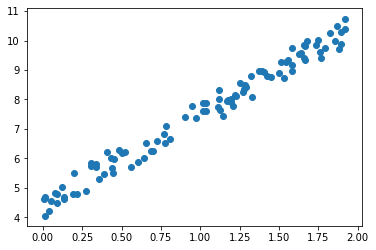

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100, 1)

plt.scatter(X, y)
plt.show()

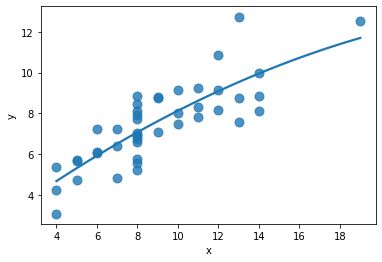

In [5]:
ans = sns.load_dataset("anscombe")
ax = sns.regplot(x="x", y="y", data=ans,
                 scatter_kws={"s": 80},
                 order=2, ci=None, truncate=True)

#sns.regplot(x=X, y=y, color='g')

#### Compute $\hat{\theta}$ using the Normal Equation

In [6]:
X_b = np.c_[np.ones((100,1)), X] # add x0 =1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.43816332],
       [3.07272198]])

#### Making a prediction using $\hat{\theta}$

[[ 4.43816332]
 [10.58360728]]


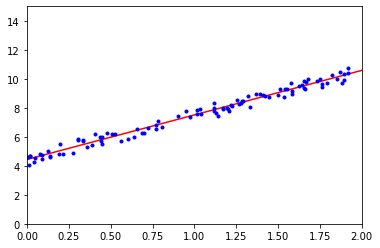

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_best)
print(y_pred)

plt.plot(X_new, y_pred, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

### **Regularization**

#### **Closed-form equation**

In [8]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[9.00484886]])

#### **Gradient Descent**

In [10]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty = 'l2') 
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Users/mengchen/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([9.14396681])

#### **Lasso Regression**

In [11]:
from sklearn.linear_model import Lasso # same the SGDRegressor(penalty = 'l1')
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.90535576])

#### **Elastic Net**

In [12]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.79416831])

#### **Early Stopping**
stop training the model as the validation error reaches minimum

In [ ]:
import numpy as np
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree = 2, include_bias =  False)
X_poly = poly_features.fit_transform(X)
X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train_poly)
scaler.fit(X_val_poly)
X_train_poly_scaled =  scaler.transform(X_train_poly)
X_val_poly_scaled =  scaler.transform(X_val_poly)

sgd_reg =  SGDRegressor(warm_start = True, penalty = None, learning_rate = 'constant', eta0 = 0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_pred = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_pred, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch
best_model